# frequency response of cylindrical alpine ponds

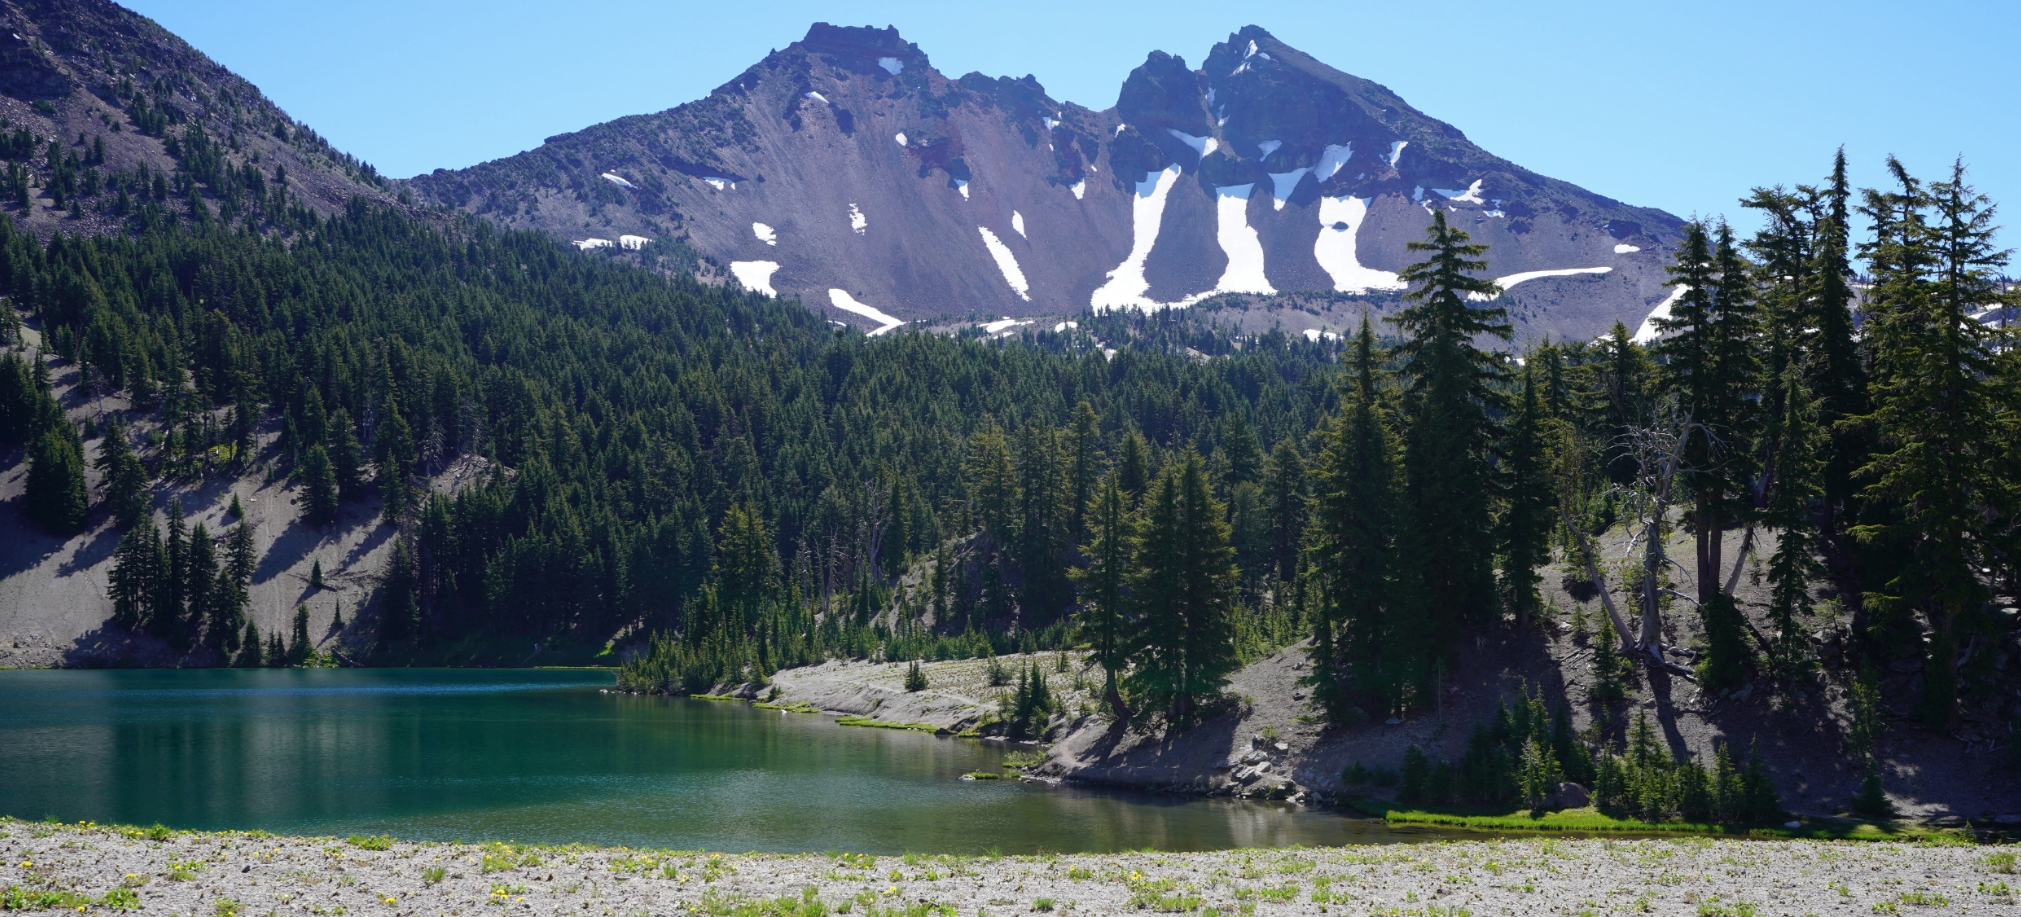
Green Lakes, OR.


In [ ]:
using Controlz
using Printf
using PyPlot
PyPlot.matplotlib.style.use(normpath(joinpath(pathof(Controlz), "..", "hipster.mplstyle")))

the air temperature $T_a$ [K] in Green Lakes, Oregon, oscillates sinusoidally according to $T_a(t)=\bar{T_a}+A\sin(\omega t)$, with a 24-hour period (warmest during the day, coldest at night). time $t$ is in units [hr].

the temperature of the ground $T_g$ [K], however, is constant.

there is a cylinder-shaped pond of radius $r$ [m], filled with water of depth $d$ [m].

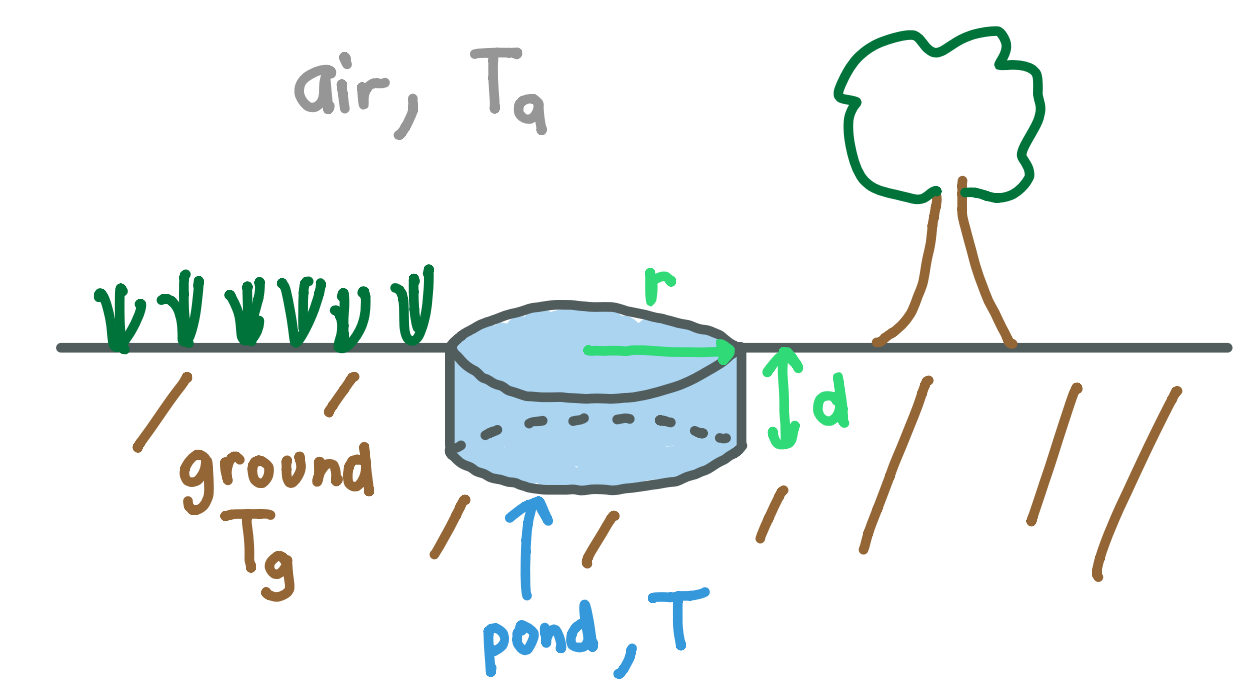

heat transfer occurs between the water in the pond and:
* the ground, with heat transfer coefficient $U_g$ kJ / (m$^2$-K-hr)
* the air, with heat transfer coefficient $U_a$ kJ / (m$^2$-K-hr)

assume the temperature of the water in the pond, $T$ [K], is spatially uniform, owing to natural convection.

because the air temperature (the input here) is oscillating, the temperature of the pond (the output here) also oscillates.

the specific heat of water is $c_p$ [kJ/(kg-K)]

the density of water is $\rho$ [kg/m$^3$].

### pencil and paper problems
(i.e. mathematical problems with variables)

(1) define some new variables for convenience.

(1a) let $A_a$ and $A_g$ [m] be the areas of pond water in contact with the air and ground, respectively. write these in terms of $r$ and $d$.

(1b) let $C$ [kJ/K] be the [thermal mass](https://en.wikipedia.org/wiki/Thermal_mass) of the pond ("$mc_p$" lumped together). write this in terms of $r$, $d$, $\rho$, and $c_p$.

$$A_a:=?$$

$$A_g:=?$$

$$C:=?$$

(2) write a dynamic model for the temperature of water in the pond $T=T(t)$ in terms of the variables $T_a$, $T_g$, $T$, $U_a$, $U_g$, $A_a$, $A_g$, and $C$.

$$\frac{d?}{dt} = ?$$

(3) write an expression for the steady state value of the pond water temperature, $\bar{T}$, which corresponds to when the air temperature is fixed at $\bar{T_a}$. 

(4) write your dynamic model in deviation form, decorating deviation variables with $^*$. remember, the ground temperature is constant. a linearization approach (although the ODE is already linear) is the easiest route to doing this.

$$\frac{d?^*}{dt} = ?$$

(5) derive the transfer function $G(s)=\mathcal{T}^*(s)/\mathcal{T_a}^*(s)$ where $\mathcal{T}^*(s):=\mathcal{L}[T^*(t)]$ and $\mathcal{T_a}^*(s):=\mathcal{L}[T_a^*(t)]$. write in standard, gain/time-constant form.

$$G(s)=\frac{\mathcal{T}^*(s)}{\mathcal{T_a}^*(s)}=?$$

### computational problems
(i.e. problems with (actual) real numbers)

(5) the air temperature $T_a$ (the input) oscillates between 268 K (night) and 284 K (day).

* what is the numerical value of $\bar{T_a}$ [K]?
* what is the numerical value of the amplitude $A$ of the input oscillations [K]?
* what is the numerical value of the frequency $\omega$ [radians/hr] of the input oscillations? assume a 24-hour period.

define each of these as variables below.

In [ ]:
T̄_a =  # steady state air temp, K
A = # amplitude, K 
ω = # frequency, rad/hr, since period = 2π / ω

# @printf("Ta = %.3f + %.3f sin(%.3f t)", T̄_a, A, ω)

(6) below are *realistic* numerical values for the variables above. from these, compute the steady state value of the pond temperature $\bar{T}$.

In [ ]:
d = 1.0 # depth of water, m
r = 10.0 # radius of pond, m

T_g = 276.0 # ground temperature, K

U_a = 100.0 * 60 * 60 / 1000 # heat xfer coeff (air    <--> pond water), kJ / [m²-K-hr]
U_g = 500.0 * 60 * 60 / 1000 # heat xfer coeff (ground <--> pond water), kJ / [m²-K-hr]

ρ = 997.0 # density of water, kg / m³
cₚ = 4.186 # specific heat of water, kJ / (kg-K)

(7) compute the gain and time constant of the transfer function $G(s)=\mathcal{T}^*(s)/\mathcal{T_a}^*(s)$. construct your transfer function as a variable `g` using `Controlz.jl`.

(8) why is the gain of $G(s)$ not equal to 1, like in the thermistor problem?

...

(9) draw the Bode plot for this transfer function via `bode_plot`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/viz/#Bode-plot-1). draw a vertical line at the input frequency $\omega$ [rad/hr] we have via `axvline(x=ω)`.

(10) based on the Bode plot, approximately what do you expect to be the range of pond temperatures over night and day? you can get a more exact value by `abs(evaluate(g, im * ω))`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#evaluate-a-transfer-function-at-a-complex-number-1).

(11) simulate the frequency response of the pond temperature for $t\in[0, 5]$ days.

on the same plot, plot $T_a(t)$ and $T(t)$ (no stars, not in deviation form). include a `legend()` to know which line is which! pass `label="blah"` to plot for the legend label.

(13) now consider a scenario when it is a very windy day. the heat transfer coefficient $U_a$ triples as a result. what do you expect to happen to the output?

triple `U_a` above and rerun to see if it matches your expectations.